In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [49]:
df = pd.read_csv("data/default_of_credit_card_clients.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [50]:
df.drop(['ID'], axis=1, inplace=True)

In [51]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [52]:
df.shape

(30000, 24)

In [53]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [54]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
x = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df['default payment next month']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

xtrain_scaler = MinMaxScaler().fit_transform(x_train)
xtest_scaler = MinMaxScaler().fit_transform(x_test)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [58]:
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(x_train, y_train)                      # Fitting model with x_train and y_train
logreg_pred = best_model.best_estimator_.predict(x_test)    # Predicting the results


print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(x_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 0.01}
Best Accuracy : 0.7882666666666667


In [59]:
#Hypertuned model
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
logreg_pred_mms = best_model.best_estimator_.predict(xtest_scaler) # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 1.0}
Best Accuracy : 0.8268


In [60]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Confusion Matrix: 
 [[5671  241]
 [1058  530]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5912
           1       0.69      0.33      0.45      1588

    accuracy                           0.83      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.81      0.83      0.80      7500

Accuracy: 0.8268
Recall/Sensitivity/True Positive Rate: 0.3337531486146096
Precision: 0.6874189364461738


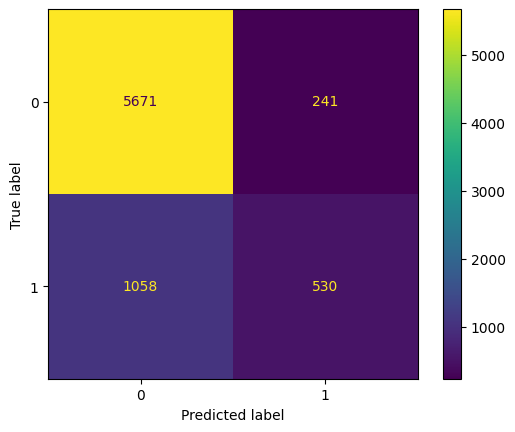

In [61]:
#confusion matrix
plot_confusion_matrix(gsv,xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, logreg_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))

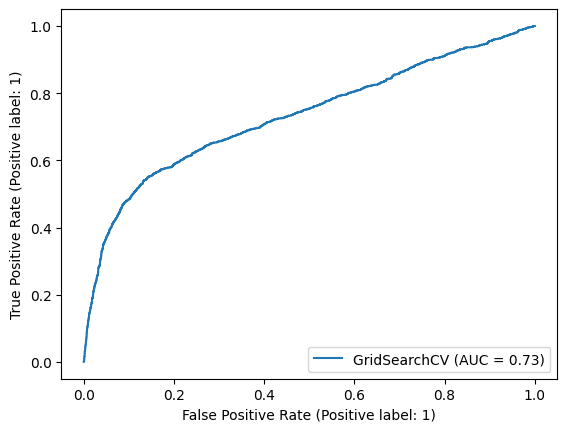

In [62]:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [64]:
lg = LogisticRegression()

clf_array = [lg]

for clf in clf_array:
    cc_scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.25, max_features=10, random_state=3)
    bagging_scores = cross_val_score(bagging_clf, x, y, cv=10, n_jobs=-1)
    
    print("Accuracy of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,cc_scores.mean(), cc_scores.std()))
    print("Accuracy of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Accuracy of: 0.779, std: (+/-) 0.001 [LogisticRegression]
Accuracy of: 0.781, std: (+/-) 0.002 [Bagging LogisticRegression]



In [65]:
clf = [lg]
eclf = VotingClassifier(estimators= [('Logistic Regression', lg)], voting='hard')
for clf, label in zip([lg, eclf], ['Logistic Regression']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.776 (+/- 0.00) [Logistic Regression]
